Построим тематические модели для корпуса новостей Lenta.ru, с которым мы уже работали ранее.

In [1]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [3]:
data = [(record.title, record.topic, record.text, record.tags) for record in records]

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-4-5b7176a9d163>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [5]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

In [6]:
data.sample(3)

,title,topic,text,tags
478138,Аэропорт Домодедово решил отсудить у Внуково долги AiRUnion,Экономика,"Аэропорт Домодедово подал иски на 950 миллионов рублей к структурам аэропорта Внуково. Таким образом Домодедово пытается вернуть себе долги авиакомпаний обанкротившегося авиаальянса AiRUnion, гарантом по которым выступал Внуково. Об этом пишет газета ""Коммерсант"". Истцом выступает ЗАО ""Коммерческое агентство аэропорта Домодедово"" (КААД), а ответчиком - ОАО ""Аэропорт Внуково"", которое контролируется правительством Москвы и частными акционерами во главе с председателем совета директоров ОАО ""Международный аэропорт Внуково"" Виталием Ванцевым. Также КААД подало несколько исков к ЗАО ""ТЗК Внуково"", топливозаправочному комплексу Внуково. Виталий Ванцев заявил изданию, что ОАО ""Аэропорт Внуково"" выступал гарантом по ряду обязательств авиакомпаний AiRUnion, когда эти перевозчики совершали перебазирование из Домодедово во Внуково. Он утверждает, что аэропорт расплатился по обязательствам. Все московские рейсы компаний, входящих в альянс AiRUnion, были переведены из аэропорта Домодедово в аэропорт Внуково с 4 по 7 сентября. В конце августа 2008 года в результате роста цен на керосин входящие в альянс AiRUnion авиакомпании ""Красэйр"", ""Домодедовские авиалинии"", ""Самара"", ""Омскавиа"" и ""Сибавиатранс"" столкнулись с нехваткой авиатоплива, так как не смогли своевременно погасить долги перед топливозаправщиками. Долги альянса превысили 800 миллионов долларов и перевозка пассажиров была практически парализована. В сентябре стало известно, что авиакомпании альянса должны войти в состав нового авиаперевозчика - ""Росавиа"", создаваемого госкорпорацией ""Ростехнологии"", правительством Москвы и администрацией Красноярского края. Кроме AiRUnion в него также вольются ""Атлант-Союз"", ГТК ""Россия"", ""Кавминводыавиа"", ""Оренбургские авиалинии"", ""Саратовские авиалинии"" и ""Владивосток",Все
672084,В избиркоме Чечни найден артиллерийский снаряд,Россия,"Боевая часть артиллерийского снаряда была обнаружена 9 марта на первом этаже здания, где находится республиканская избирательная комиссия Чечни, сообщает сайт ""Коммерсант.Ру"". На то, что в здании находится взрывчатка, указала в ходе проверки помещений, проведенной утром, служебная собака. Снаряд находился под полом, на глубине около 70 сантиметров. Военные полагают, что он пролежал там со времени штурма Грозного федеральными войсками осенью 1999 года. Таким образом, предположения о том, что здание избиркома, где идет подготовка к референдуму 23 марта, заминировано чеченскими боевиками, не подтвердились.",Все
369129,В Подмосковье разоблачили двух милиционеров-грабителей,Россия,"В Волоколамском районе Подмосковья разоблачили преступную группировку, в которую входили два сотрудника милиции, сообщает в четверг, 7 апреля, ""Интерфакс"" со ссылкой на управление общественных связей МВД РФ. Секретная операция, в ходе которой были установлены личности подозреваемых и задержаны двое сотрудников подмосковного ОВД, проводилась в течение нескольких месяцев. В ней участвовали сотрудники криминальной милиции ГУВД по Московской области, департамента собственной безопасности МВД РФ и управления собственной безопасности по Московской области. Члены преступной группировки подозреваются в совершении ряда тяжких преступлений, в том числе убийств, разбойных нападений и грабежей. При задержании у участников группировки было изъято большое количество оружия. Еще несколько человек находятся в розыске. После того, как была установлена связь сотрудников милиции с преступной группировкой, начальник ОВД по Волоколамскому району был отстранен от своей должности.",Все


In [7]:
len(data)

739350

In [8]:
data.topic.value_counts().head(15)

Россия               160518
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

In [9]:
len(data.topic.value_counts())

24

In [10]:
topics = ['Из жизни', 'Мир', 'Интернет и СМИ', 'Бизнес', 
          'Дом', 'Силовые структуры']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

257695

### Предобработка


Все модели, с которыми мы будем работать далее, работают с предобработанными текстами, поэтому сперва проведем стандартную предобработку текста:

In [11]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
# from pymystem3 import Mystem

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gromo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [14]:
stopwords_additional = ['который', 'это', 'также']

In [15]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian') + stopwords_additional

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [16]:
data.text.iloc[1]

'Хакерская группировка Anonymous опубликовала новые документы о деятельности британского аналитического центра Integrity Initiative. Из материалов следует, что центр получает финансирование от некого Института государственного управления под руководством Кристофера Доннелли. Хакеры выложили в открытый доступ его паспорт, резюме, а также сведения о его связях с Министерством обороны Великобритании. Согласно документам, в 2014 году Доннелли выдвинул ряд предложений британским властям в связи с ситуацией в Крыму. В частности, он планировал заминировать Севастопольскую бухту, окружить полуостров войсками, а также уничтожить оставшиеся в Крыму самолеты «в знак серьезности намерений». После публикации заметки часть документов, на которые члены группировки ссылаются в своем расследовании, была удалена. Также хакеры утверждают, что Доннелли был инициатором расследования «российского вмешательства» в референдум о независимости в Каталонии. Он пригласил членов испанского отделения Integrity Init

In [17]:
print(preprocess(data.text.iloc[1]))

['хакерский', 'группировка', 'anonymous', 'опубликовать', 'новый', 'документ', 'деятельность', 'британский', 'аналитический', 'центр', 'integrity', 'initiative', 'материал', 'следовать', 'центр', 'получать', 'финансирование', 'некий', 'институт', 'государственный', 'управление', 'руководство', 'кристофер', 'доннелли', 'хакер', 'выложить', 'открытый', 'доступ', 'паспорт', 'резюме', 'сведение', 'связь', 'министерство', 'оборона', 'великобритания', 'согласно', 'документ', 'год', 'доннелли', 'выдвинуть', 'ряд', 'предложение', 'британский', 'власть', 'связь', 'ситуация', 'крым', 'частность', 'планировать', 'заминировать', 'севастопольский', 'бухта', 'окружить', 'полуостров', 'войско', 'уничтожить', 'остаться', 'крым', 'самолёт', 'знак', 'серьёзность', 'намерение', 'публикация', 'заметка', 'часть', 'документ', 'член', 'группировка', 'ссылаться', 'свой', 'расследование', 'удалить', 'хакер', 'утверждать', 'доннелли', 'инициатор', 'расследование', 'российский', 'вмешательство', 'референдум', 'н

Ниже мы оставим только случайные 10,000 текстов из нашей коллекции, чтобы ускорить вычисления:

In [18]:
data = data.sample(10000)
data.topic.value_counts()

Мир                  5367
Интернет и СМИ       1663
Из жизни             1094
Дом                  842 
Силовые структуры    766 
Бизнес               268 
Name: topic, dtype: int64

In [19]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [20]:
data['text'] = preprocessed_text
data.sample(3)

,title,topic,text,tags
651161,В Аргентине у самолета при взлете отвалилось колесо,Мир,"[пятница, аргентина, самолёт, местный, авиакомпания, austral, взлёт, потерять, колесо, шасси, вынудить, совершить, экстренный, посадка, сообщать, агентство, france, presse, самолёт, приземлиться, международный, аэропорт, эзейза, ezeiza, international, airport, юг, буэнос, айрес, несколько, секунда, взлёт, аэропорт, aeroparque, buenos, aires, отскочить, колесо, передний, шасси, борт, находиться, пассажир, состояние, сообщаться, самолёт, выполнять, внутренний, рейс, направляться, район, водопад, игуаз, iguazu, falls, север, страна]",Все
286692,Гавайский серфер покорил 30-метровую волну,Из жизни,"[гавайский, сёрфер, гарретта, макнамар, покорить, волна, высота, около, метр, писать, the, guardian, рекордный, попытка, американец, предпринять, португальский, населить, пункт, назар, граничить, запад, атлантический, океан, случай, сёрфер, подать, заявка, регистрация, рекорд, побить, собственный, достижение, установленный, год, товарищ, макнамар, алистер, менний, участвовать, сёрфинг, назар, назвать, поступок, свой, коллега, воодушевлять, вдохновлять, слово, менний, волна, погода, оказаться, макнамар, идеальный, достигнуть, поставить, цель, допустить, никакой, ошибка, опасный, участок, поток, май, год, книга, рекорд, гиннесса, зафиксировать, рекорд, макнамар, покорить, волна, высота, метр, достижение, установить, ноябрь, назар, рекорд, записать, видео, собираться, сёрфер, подавать, заявка, книга, уточняться, макнамар, друг, являться, профессиональный, сёрфер, путешествовать, мир, поиск, больший, волна]",Достижения
12445,Судья скрылся из-за взятки в 20 тысяч рублей,Силовые структуры,"[москва, заочно, арестовать, бывший, мировой, судья, обвинять, получение, взятка, тысяча, рубль, понедельник, сентябрь, сообщаться, сайт, столичный, управление, следственный, комитет, россия, скр, судебный, коллегия, московский, городской, суд, удовлетворить, ходатайство, председатель, следственный, комитет, россия, алексей, зорин, заочно, избрать, мера, пресечение, вид, заключение, стража, говориться, сообщение, данные, следствие, ноябрь, год, судья, потребовать, гражданин, взятка, неприменение, административный, арест, либо, обязательный, работа, декабрь, мужчина, участвовать, рамка, оперативно, разыскной, мероприятие, передать, зорин, паспорт, тысяча, рубль, отношение, судья, возбудить, уголовный, дело, получение, взятка, скрыться, следствие, объявить, международный, розыск]",Следствие и суд


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [21]:
from gensim.models import *
from gensim import corpora

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [22]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

Векторизуем документы:

In [23]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

Теперь можем обучать модель:

In [24]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=7, chunksize=50, update_every=1, passes=2)

Wall time: 7.94 s


Посмотрим на получившиеся темы:

In [25]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.018*"свой" + 0.011*"президент" + 0.011*"сша" + 0.011*"год" + 0.008*"стать" + 0.007*"американский" + 0.007*"штат" + 0.007*"человек" + 0.006*"бывший" + 0.006*"опубликовать"'),
 (1,
  '0.015*"год" + 0.015*"суд" + 0.013*"дело" + 0.010*"аль" + 0.007*"обвинение" + 0.007*"сообщать" + 0.007*"боевик" + 0.007*"задержать" + 0.006*"израильский" + 0.006*"израиль"'),
 (2,
  '0.009*"сайт" + 0.008*"компания" + 0.008*"год" + 0.007*"россия" + 0.006*"интернет" + 0.006*"работа" + 0.006*"российский" + 0.006*"информация" + 0.006*"газета" + 0.005*"новый"'),
 (3,
  '0.017*"страна" + 0.013*"сша" + 0.011*"президент" + 0.010*"год" + 0.010*"заявить" + 0.009*"россия" + 0.009*"военный" + 0.009*"министр" + 0.007*"глава" + 0.007*"правительство"'),
 (4,
  '0.022*"человек" + 0.014*"город" + 0.013*"сообщать" + 0.011*"произойти" + 0.010*"погибнуть" + 0.010*"находиться" + 0.009*"результат" + 0.009*"полиция" + 0.008*"время" + 0.008*"около"'),
 (5,
  '0.038*"год" + 0.028*"процент" + 0.019*"миллион" + 0.019*"тысяча

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

C:\Users\gromo\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


Wall time: 4.18 s


Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [27]:
print(lda.log_perplexity(corpus))


C:\Users\gromo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-7.878130641038558


In [28]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

C:\Users\gromo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.0003789416148513233


In [29]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

C:\Users\gromo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.473875890186891


Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\gromo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\gromo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/5 [00:00<?, ?it/s]

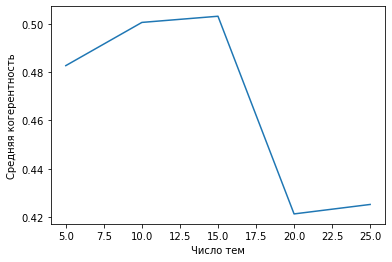

In [31]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [32]:
lda_15 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_15, corpus, dictionary)
pyLDAvis.display(vis_data)

C:\Users\gromo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\gromo\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
